In [1]:
from inputs import customers, depots, vehicle_weight
from models import SMA_VRP, GeneticAgent, RSAgent, TabouAgent
import random as rd
from tqdm.notebook import trange
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

customers = rd.sample(customers, 50)

result_df = pd.DataFrame()

c:\Users\jules\AppData\Local\Programs\Python\Python311\Lib\site-packages\mesa\time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


  0%|          | 0/150 [00:00<?, ?it/s]

list sorted, best score =  10460.930319725052
list sorted, best score =  10450.165438084037
list sorted, best score =  10435.579537830621
list sorted, best score =  10507.069400625915
list sorted, best score =  10507.069400625915
list sorted, best score =  10507.069400625915
list sorted, best score =  10442.287654758566
list sorted, best score =  10442.287654758566
list sorted, best score =  10424.283252757952
list sorted, best score =  10329.657817865944
list sorted, best score =  10329.657817865944
list sorted, best score =  10319.157515426046
list sorted, best score =  10294.191177337807
list sorted, best score =  10294.191177337807
list sorted, best score =  10254.107477920754
list sorted, best score =  10220.622171733276
list sorted, best score =  10218.292337169445
list sorted, best score =  10115.53487572517
list sorted, best score =  10168.828030425986
list sorted, best score =  10167.79126890987
list sorted, best score =  10115.055575784336
list sorted, best score =  10232.862

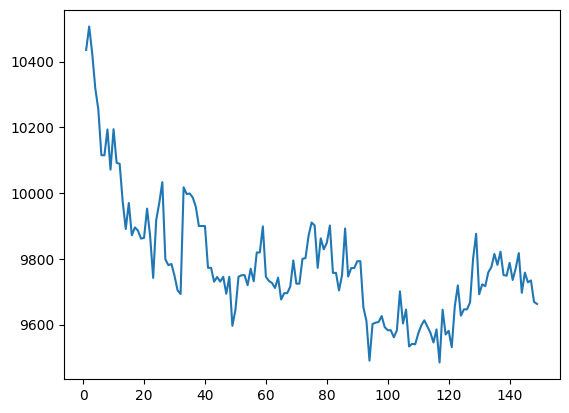

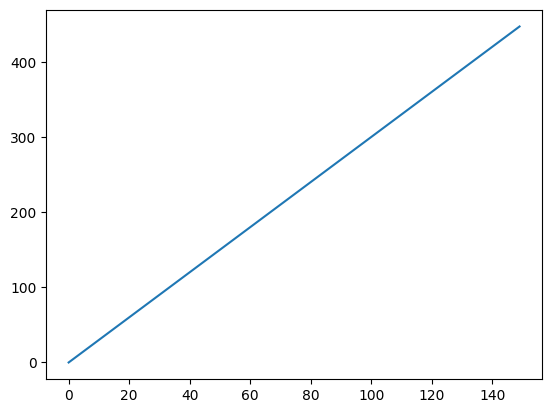

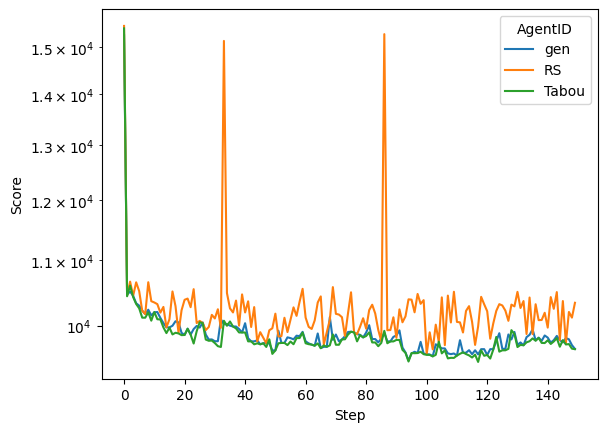

In [2]:


cout_vehicule = rd.uniform(0, 100)

gen_pop_size = rd.randint(4, 15)
Pcross = rd.uniform(0,1)
Pmut = rd.uniform(0,1)

rs_pop_size = rd.randint(4, 15)
t0 = rd.uniform(0,100)
cooling = rd.uniform(0, 0.001)
nb_iter = rd.randint(5,10)

tabou_pop_size = rd.randint(4, 15)
tabou_size = rd.randint(5,10)
tabou_neighbors = rd.randint(5,10)



sma = SMA_VRP(customers, depots[0], vehicle_weight, cout_vehicule)

sma.add_agent(GeneticAgent('gen',sma, 100, 0.8, 0.1))
sma.add_agent(RSAgent('RS', sma, rs_pop_size, t0, cooling, nb_iter))
sma.add_agent(TabouAgent('Tabou', sma, tabou_pop_size, tabou_size, tabou_neighbors))


for i in trange(150):
    sma.step()

sma.datacollector.get_model_vars_dataframe().best_solution.plot(kind="line")
plt.figure()
sma.datacollector.get_model_vars_dataframe().pool_size.plot(kind="line")
plt.figure()
sns.lineplot(data =sma.datacollector.get_agent_vars_dataframe(), x = "Step", y = "Score", hue = "AgentID")
plt.yscale('log')

result_df = pd.concat([result_df, pd.DataFrame({
    'gen_pop_size' : [gen_pop_size],
    'Pcross' : [Pcross],
    'Pmut' : [Pmut],
    'rs_pop_size' : [rs_pop_size],
    't0' : [t0],
    'cooling' : [cooling],
    'nb_iter' : [nb_iter],
    'tabou_pop_size' : [tabou_pop_size],
    'tabou_size' : [tabou_size],
    'tabou_neighbors' : [tabou_neighbors],
    'best_solution_reached_at' : [sma.datacollector.get_model_vars_dataframe().best_solution.argmin()],
    'best_solution' : [sma.datacollector.get_model_vars_dataframe().best_solution.min()]
    })], ignore_index=True).reset_index(drop=True)


In [3]:
print(sma.good_solution_pool[0].score())

9830.87451336849


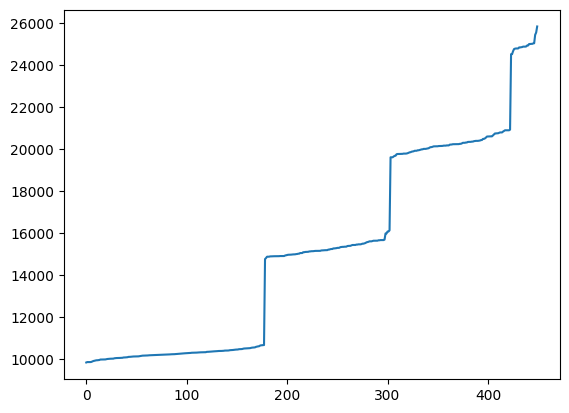

In [4]:
plt.plot(list(map(lambda s: s.score(),sma.good_solution_pool)))

In [5]:
sma.datacollector.get_model_vars_dataframe()

,best_solution,pool_size
0,NaN,0
1,10435.579538,3
2,10507.069401,6
3,10424.283253,9
4,10319.157515,12
...,...,...
145,9758.085225,435
146,9728.569950,438
147,9734.325321,441
148,9669.285013,444
